In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# New Section

In [4]:
store_sales = pd.read_csv("train (2).csv")
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [5]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


# converting date from object datatype to datatime datatype

In [6]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [7]:
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [8]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [9]:
store_sales = store_sales.drop(['item', 'store'], axis=1)

In [10]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [11]:
store_sales.head(10)

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
5,2013-01-06,12
6,2013-01-07,10
7,2013-01-08,9
8,2013-01-09,12
9,2013-01-10,9


# converting data to a month period, and then sum the number of items in each month

In [12]:
store_sales['date'] = store_sales['date'].dt.to_period("M")

In [13]:
store_sales

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10
...,...,...
912995,2017-12,63
912996,2017-12,59
912997,2017-12,74
912998,2017-12,62


In [14]:
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [15]:
monthly_sales

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242
5,2013-06,795597
6,2013-07,855922
7,2013-08,766761
8,2013-09,689907
9,2013-10,656587


# convert the resulting date column to timestamp datatype

In [16]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [17]:
monthly_sales

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


# Visualization

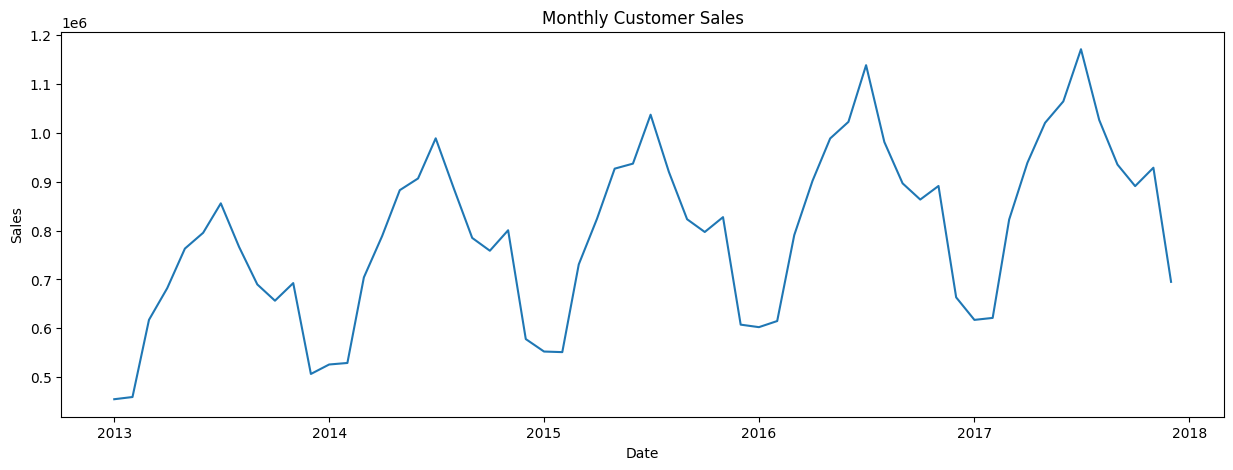

In [18]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()

# call the difference on the sales columns to make the sales data stationery

In [19]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


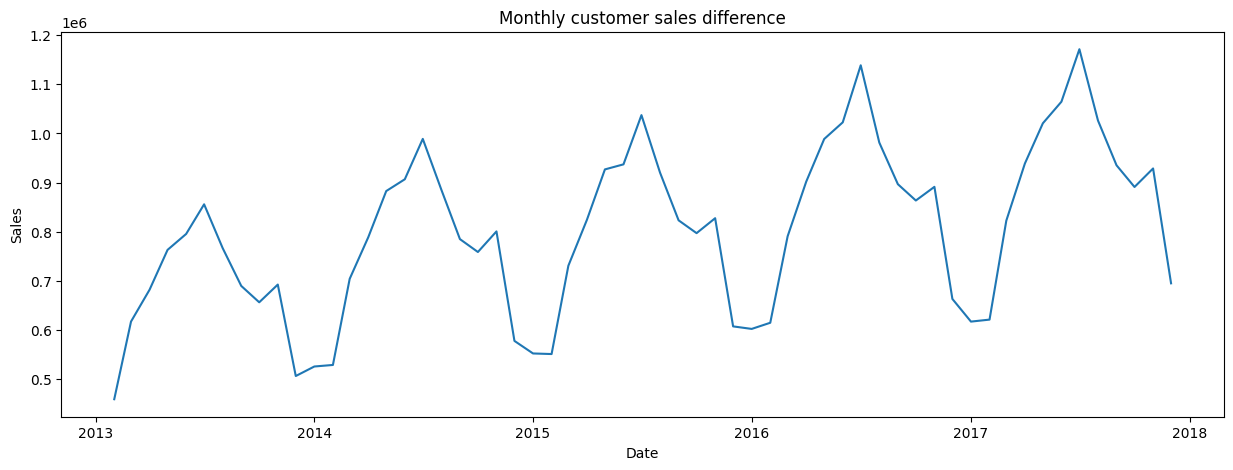

In [20]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly customer sales difference")
plt.show()

# Dropping off sales and date

In [21]:
supervised_data = monthly_sales.drop(['date', 'sales'], axis=1)

# Preparing the supervised data
Supervised learning is a type of machine learning where an algorithm learns to map input data to a desired output based on a labeled dataset. In supervised learning, the algorithm is provided with a training dataset that consists of input-output pairs. The algorithm's goal is to learn a mapping function that can predict the correct output for new, unseen inputs.

Here's a breakdown of the key components of supervised learning:

* Input Data (Features): These are the variables or attributes that the algorithm uses to make predictions. In a supervised learning problem, you have a set of features that describe the input, and the algorithm learns to associate these features with the corresponding output.

* Output Data (Labels or Targets): This represents the desired prediction or target for each input in the training dataset. The goal of the algorithm is to learn to predict these labels accurately.

* Training Dataset: The training dataset is a collection of examples, where each example consists of input data and its corresponding output label. This dataset is used to train the machine learning model.

* Model (Hypothesis Function): The model is the algorithm or mathematical function that takes the input features and produces a prediction. In supervised learning, the model is trained to minimize the difference between its predictions and the true labels in the training data.

* Loss Function: The loss function quantifies the error or difference between the model's predictions and the actual labels. The goal during training is to minimize this loss, which helps the model improve its predictions.

* Learning Algorithm: This is the optimization algorithm used to update the model's parameters iteratively during training. Common optimization algorithms include gradient descent and its variants.

* Testing/Evaluation Data: After training, the model's performance is assessed using a separate dataset called the testing or evaluation dataset. This dataset helps measure how well the model generalizes to new, unseen data.

* Prediction: Once the model is trained and evaluated, it can be used to make predictions on new, unseen data by inputting the features, and it will generate predictions based on what it has learned from the training data.

Supervised learning is widely used in various applications, such as image classification, natural language processing, regression analysis, and recommendation systems. It is a fundamental and extensively studied area in machine learning, and its success relies on having access to labeled data for training.








In [22]:
for i in range(1, 13):
  col_name = 'month_' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

In [23]:
supervised_data

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1,4513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157965.0,4513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64892.0,157965.0,4513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80968.0,64892.0,157965.0,4513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,32355.0,80968.0,64892.0,157965.0,4513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0,NaN,NaN,NaN,NaN,NaN,NaN
8,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0,NaN,NaN,NaN,NaN,NaN
9,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0,NaN,NaN,NaN,NaN
10,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0,NaN,NaN,NaN


In [24]:
supervised_data = supervised_data.dropna().reset_index(drop=True)

In [25]:
supervised_data

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


# Split the data into train and test

In [26]:
train_data = supervised_data[:-24] # previous 12 month
test_data = supervised_data[-12:] # coming 12 month

print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (23, 13)
Test Data Shape:  (12, 13)


# Min - Max Scaler

To scale the feature values to restrict them range of minus one and one

The Min-Max scaling technique is a common data preprocessing method used in machine learning to normalize or scale numerical features of a dataset. It transforms the values of features to a specific range, typically between 0 and 1 (or any user-defined range), while preserving the relative relationships between the data points.

This scaling technique is also known as "min-max normalization" or "feature scaling."

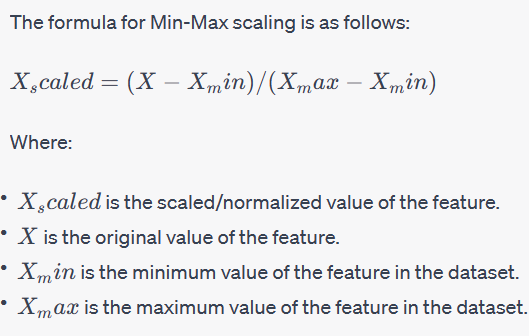

# fit method
The primary purpose of the fit method is to compute and store the parameters necessary for a specific preprocessing operation based on the data you provide.

Fit method computes the mean and standard deviation of the training data.

In [27]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)


MinMaxScaler(feature_range=(-1, 1))

In [28]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [29]:
train_data

array([[ 0.12267595,  0.20344758, -0.81758535,  0.28633667, -0.05850103,
        -0.27488947, -0.33606217,  0.40696724,  0.26794062,  0.50957454,
         0.44565603,  0.91345475,  0.1421822 ],
       [ 0.977881  ,  0.12267595,  0.20344758, -0.81758535,  0.28633667,
        -0.05850103, -0.27488947, -0.33606217,  0.40696724,  0.26794062,
         0.52645639,  0.44565603,  0.91345475],
       [ 0.52769224,  0.977881  ,  0.12267595,  0.20344758, -0.81758535,
         0.28633667, -0.05850103, -0.27488947, -0.33606217,  0.40696724,
         0.28212023,  0.52645639,  0.44565603],
       [ 0.574167  ,  0.52769224,  0.977881  ,  0.12267595,  0.20344758,
        -0.81758535,  0.28633667, -0.05850103, -0.27488947, -0.33606217,
         0.42270161,  0.28212023,  0.52645639],
       [ 0.22623761,  0.574167  ,  0.52769224,  0.977881  ,  0.12267595,
         0.20344758, -0.81758535,  0.28633667, -0.05850103, -0.27488947,
        -0.32863724,  0.42270161,  0.28212023],
       [ 0.51553922,  0.226237

In [30]:
test_data

array([[-0.12204966, -1.02635392,  0.24535439, -0.05787474, -0.31370458,
        -0.67437352,  0.68397168,  0.27578914,  0.53846345,  0.65919343,
         1.00371935,  0.18241652,  0.09369997],
       [ 0.12731349, -0.12204966, -1.02635392,  0.24535439, -0.05787474,
        -0.31370458, -0.67437352,  0.68397168,  0.27578914,  0.53846345,
         0.67774849,  1.00371935,  0.18241652],
       [ 1.10768225,  0.12731349, -0.12204966, -1.02635392,  0.24535439,
        -0.05787474, -0.31370458, -0.67437352,  0.68397168,  0.27578914,
         0.55566836,  0.67774849,  1.00371935],
       [ 0.68467253,  1.10768225,  0.12731349, -0.12204966, -1.02635392,
         0.24535439, -0.05787474, -0.31370458, -0.67437352,  0.68397168,
         0.29005652,  0.55566836,  0.67774849],
       [ 0.51382935,  0.68467253,  1.10768225,  0.12731349, -0.12204966,
        -1.02635392,  0.24535439, -0.05787474, -0.31370458, -0.67437352,
         0.70280384,  0.29005652,  0.55566836],
       [ 0.32551464,  0.513829

In the supervised dataframe , First column always correspond to output or target and remaining column act as input features

# transform method
In scikit-learn, the transform method is used in preprocessing to apply a previously computed transformation to a dataset. This method is commonly used after the fit method has been applied to learn the parameters or statistics needed for the transformation.

In [31]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
train_data

array([[0.1071187 , 0.1071191 , 0.10711403, 0.10711952, 0.1071178 ,
        0.10711673, 0.10711642, 0.10712012, 0.10711942, 0.10712063,
        0.11950143, 0.11950379, 0.11949991],
       [0.10712295, 0.1071187 , 0.1071191 , 0.10711403, 0.10711952,
        0.1071178 , 0.10711673, 0.10711642, 0.10712012, 0.10711942,
        0.11950184, 0.11950143, 0.11950379],
       [0.10712072, 0.10712295, 0.1071187 , 0.1071191 , 0.10711403,
        0.10711952, 0.1071178 , 0.10711673, 0.10711642, 0.10712012,
        0.11950061, 0.11950184, 0.11950143],
       [0.10712095, 0.10712072, 0.10712295, 0.1071187 , 0.1071191 ,
        0.10711403, 0.10711952, 0.1071178 , 0.10711673, 0.10711642,
        0.11950132, 0.11950061, 0.11950184],
       [0.10711922, 0.10712095, 0.10712072, 0.10712295, 0.1071187 ,
        0.1071191 , 0.10711403, 0.10711952, 0.1071178 , 0.10711673,
        0.11949754, 0.11950132, 0.11950061],
       [0.10712066, 0.10711922, 0.10712095, 0.10712072, 0.10712295,
        0.1071187 , 0.10711

In [33]:
test_data

array([[0.10711749, 0.10711299, 0.10711931, 0.10711781, 0.10711653,
        0.10711474, 0.10712149, 0.10711946, 0.10712077, 0.10712137,
        0.11950424, 0.11950011, 0.11949967],
       [0.10711873, 0.10711749, 0.10711299, 0.10711931, 0.10711781,
        0.10711653, 0.10711474, 0.10712149, 0.10711946, 0.10712077,
        0.1195026 , 0.11950424, 0.11950011],
       [0.1071236 , 0.10711873, 0.10711749, 0.10711299, 0.10711931,
        0.10711781, 0.10711653, 0.10711474, 0.10712149, 0.10711946,
        0.11950199, 0.1195026 , 0.11950424],
       [0.1071215 , 0.1071236 , 0.10711873, 0.10711749, 0.10711299,
        0.10711931, 0.10711781, 0.10711653, 0.10711474, 0.10712149,
        0.11950065, 0.11950199, 0.1195026 ],
       [0.10712065, 0.1071215 , 0.1071236 , 0.10711873, 0.10711749,
        0.10711299, 0.10711931, 0.10711781, 0.10711653, 0.10711474,
        0.11950273, 0.11950065, 0.11950199],
       [0.10711971, 0.10712065, 0.1071215 , 0.1071236 , 0.10711873,
        0.10711749, 0.10711

In [34]:
x_train, y_train = train_data[:, 1:], train_data[:, 0:1]
x_test, y_test = test_data[:, 1:], test_data[:, 0:1]

In [35]:
# ravel method flatten a array into 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

In [36]:
print("X_train Shape: ", x_train.shape)
print("y_train Shape: ", y_train.shape)
print("x_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (23, 12)
y_train Shape:  (23,)
x_test Shape:  (12, 12)
y_test Shape:  (12,)


Make prediction data frame to merge the predicted sales prices of all trained algorithm

In [37]:
monthly_sales['date'][-12:]

48   2017-01-01
49   2017-02-01
50   2017-03-01
51   2017-04-01
52   2017-05-01
53   2017-06-01
54   2017-07-01
55   2017-08-01
56   2017-09-01
57   2017-10-01
58   2017-11-01
59   2017-12-01
Name: date, dtype: datetime64[ns]

In [38]:
sales_data = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_data)

In [39]:
monthly_sales['sales'][-13:]

47     663411
48     617306
49     621369
50     822667
51     938862
52    1020686
53    1064624
54    1171393
55    1026403
56     935263
57     891160
58     928837
59     695170
Name: sales, dtype: int64

In [40]:
actual_sales = monthly_sales['sales'][-13:].to_list()
actual_sales

[663411,
 617306,
 621369,
 822667,
 938862,
 1020686,
 1064624,
 1171393,
 1026403,
 935263,
 891160,
 928837,
 695170]

# Linear Regression
Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. It is a fundamental tool in statistics and machine learning for tasks such as prediction and understanding the relationships between variables.

In its simplest form, linear regression deals with a single dependent variable (also called the target or response variable) and a single independent variable (also called the predictor or feature variable). The relationship between the two is modeled as a straight line:


y = mx + b

y is the dependent variable.
x is the independent variable.
m is the slope of the line, representing the change in y for a unit change in x.
b is the y-intercept, representing the value of y when x is zero.

To create linear regression model and predicted output

In [41]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)


In [42]:
lr_pre = lr_pre.reshape(-1, 1)

In [43]:
lr_pre.shape

(12, 1)

In [44]:
lr_pre_test_set = np.concatenate([lr_pre, x_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [45]:
lr_pre_test_set

array([[-0.09498594, -1.02635392,  0.24535439, -0.05787474, -0.31370458,
        -0.67437352,  0.68397168,  0.27578914,  0.53846345,  0.65919343,
         1.00371935,  0.18241652,  0.09369997],
       [ 0.08261621, -0.12204966, -1.02635392,  0.24535439, -0.05787474,
        -0.31370458, -0.67437352,  0.68397168,  0.27578914,  0.53846345,
         0.67774849,  1.00371935,  0.18241652],
       [ 1.09625112,  0.12731349, -0.12204966, -1.02635392,  0.24535439,
        -0.05787474, -0.31370458, -0.67437352,  0.68397168,  0.27578914,
         0.55566836,  0.67774849,  1.00371935],
       [ 0.73730636,  1.10768225,  0.12731349, -0.12204966, -1.02635392,
         0.24535439, -0.05787474, -0.31370458, -0.67437352,  0.68397168,
         0.29005652,  0.55566836,  0.67774849],
       [ 0.57792698,  0.68467253,  1.10768225,  0.12731349, -0.12204966,
        -1.02635392,  0.24535439, -0.05787474, -0.31370458, -0.67437352,
         0.70280384,  0.29005652,  0.55566836],
       [ 0.26923047,  0.513829

In [46]:
# after predicting the sales
result_list = []

for index in range(0, len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0] + actual_sales[index])

In [47]:
lr_pre_series = pd.Series(result_list, name="Linear prediction")

In [48]:
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index=True)

In [49]:
predict_df

,date,Linear prediction
0,2017-01-01,6.634109e+05
1,2017-02-01,6.173061e+05
2,2017-03-01,6.213701e+05
3,2017-04-01,8.226677e+05
4,2017-05-01,9.388626e+05
5,2017-06-01,1.020686e+06
6,2017-07-01,1.064625e+06
7,2017-08-01,1.171392e+06
8,2017-09-01,1.026403e+06
9,2017-10-01,9.352630e+05


# mean squared error

Mean Squared Error (MSE) is a commonly used metric in machine learning and statistics to measure the performance of a regression model. It quantifies the average squared difference between the actual (observed) values and the predicted values produced by the model. The lower the MSE, the better the model's predictions align with the actual data.

Mathematically, MSE is calculated as follows:

MSE = (1/n) * Σ(yi - ŷi)^2

Where:

- MSE is the Mean Squared Error.
- n is the number of data points in the dataset.
- yi represents the actual (observed) value for the i-th data point.
- ŷi represents the predicted value for the i-th data point.
- Σ denotes the sum over all data points.

In [50]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear prediction'], monthly_sales['sales'][-12:]))
print("Linear Regression MSE: ", lr_mse)

Linear Regression MSE:  116719.55698582447


# mean absolute error
Mean Absolute Error (MAE) is another commonly used metric in machine learning and regression analysis to assess the performance of a model's predictions. Like Mean Squared Error (MSE), MAE quantifies the prediction error, but it does so by taking the absolute difference between the actual (observed) values and the predicted values produced by the model.

Mathematically, MAE is calculated as follows:

MAE = (1/n) * Σ|yi - ŷi|

Where:

- MAE is the Mean Absolute Error.
- n is the number of data points in the dataset.
- yi represents the actual (observed) value for the i-th data point.
- ŷi represents the predicted value for the i-th data point.
-Σ denotes the sum over all data points.
- | | denotes the absolute value, ensuring that all differences are positive.

In [52]:
lr_mae = mean_squared_error(predict_df['Linear prediction'], monthly_sales['sales'][-12:])
print("Linear Regression MAE: ", lr_mae)

Linear Regression MAE:  13623454982.967125


# R2 Score
The R-squared (R2) score, also known as the coefficient of determination, is a metric used in machine learning and regression analysis to evaluate the goodness of fit of a regression model. It measures the proportion of the variance in the dependent variable (the target variable) that is explained by the independent variables (the features) in the model. R2 values range from 0 to 1, where:

- An R2 score of 0 indicates that the model does not explain any of the variance in the target variable. It essentially means that the model's predictions are no better than simply predicting the mean of the target variable.

- An R2 score of 1 indicates that the model perfectly explains all the variance in the target variable. In practice, it's rare to achieve an R2 score of 1 because real-world data typically contains some degree of randomness and noise.

- R2 scores between 0 and 1 represent the proportion of variance explained by the model. Higher R2 values indicate that the model is better at explaining the variance in the target variable.

Mathematically, R2 is calculated as follows:

R2 = 1 - (SSR / SST)

Where:

- SSR (Sum of Squared Residuals) is the sum of the squared differences between the actual target values and the predicted values from the model.
- SST (Total Sum of Squares) is the sum of the squared differences between the actual target values and the mean of the target values.
Here's a step-by-step explanation of how R2 is computed:







In [53]:
lr_r2_score = r2_score(predict_df['Linear prediction'], monthly_sales['sales'][-12:])
print("Linear Regression R2: ", lr_r2_score)

Linear Regression R2:  0.5377516459389544


# Visualization of the prediction against actual sales

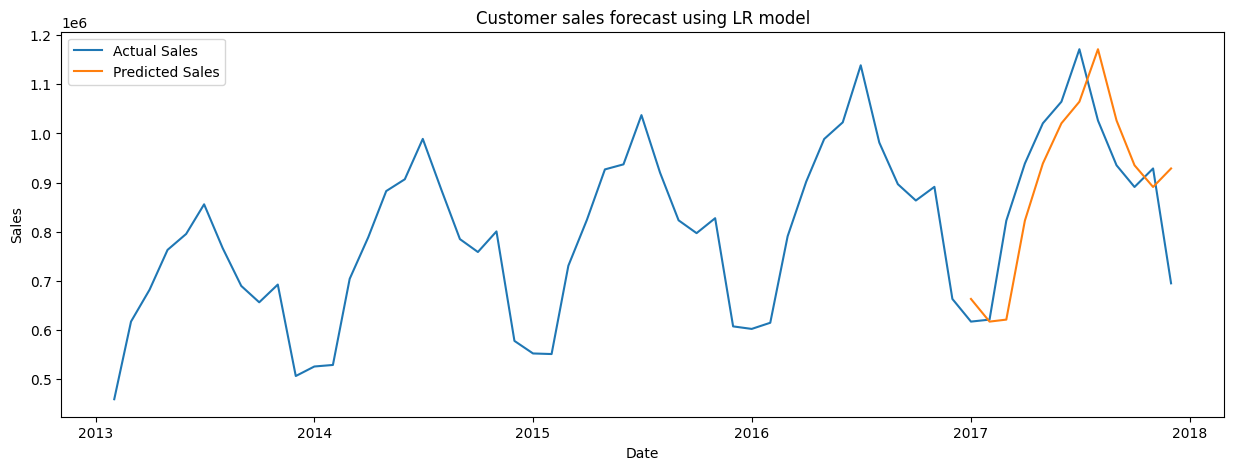

In [55]:
plt.figure(figsize=(15,5))
# actual sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])
# predicted sales
plt.plot(predict_df['date'], predict_df['Linear prediction'])
plt.title("Customer sales forecast using LR model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Actual Sales", "Predicted Sales"])
plt.show()